# Challenge lycéen MathAData
## Réseau de neurones et reconnaisance d'images

!!! abstract Fonctionnement du notebook  
Ce document interactif (appelé notebook) va vous guider pour coder un **réseau de neurones appelé perceptron**. Vous pourrez d'abord compléter des fonctions en Python pour que l'algorithme fonctionne correctement, puis l'améliorer petit à petit pour essayer de vous hisser vers le haut du classement.  
!!!

!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">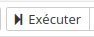</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!

In [ ]:
from utilitaires_perceptron import *
from utilitaires_mnist_papier import *

!!! tip Vérification de votre token  
Pour utiliser ce notebook, vous devez vous inscrire sur [le site mathadata](https://mathadata.fr/fr/challenge).  
Vous recevrez alors un token de soumission par mail. Remplacez les `...` dans la cellule suivante par votre token puis exécutez la cellule.  
Pour recevoir à nouveau votre token, rendez vous sur [cette page](https://mathadata.fr/challenge/renvoi_email).  
!!!

In [ ]:
token = "..."

# NE PAS TOUCHER CETTE LIGNE
validation_token()

## Point de départ

!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
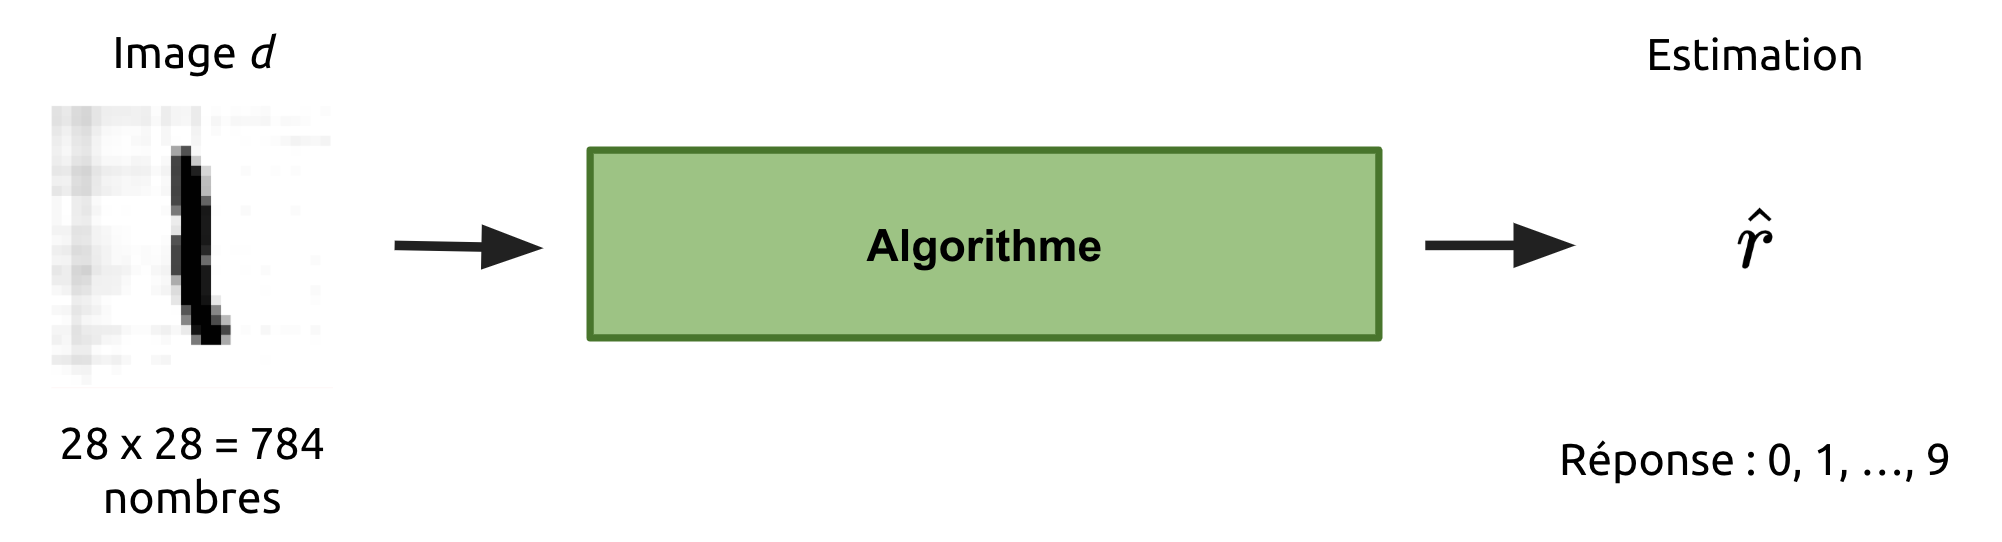  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 0.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours 0**.  
!!!

In [ ]:
import utilitaires_common

def algorithme(d):
    return 0

validation_execution_algo_fixe()

!!! question Que répond l'algorithme fainéant pour ces trois images ?  
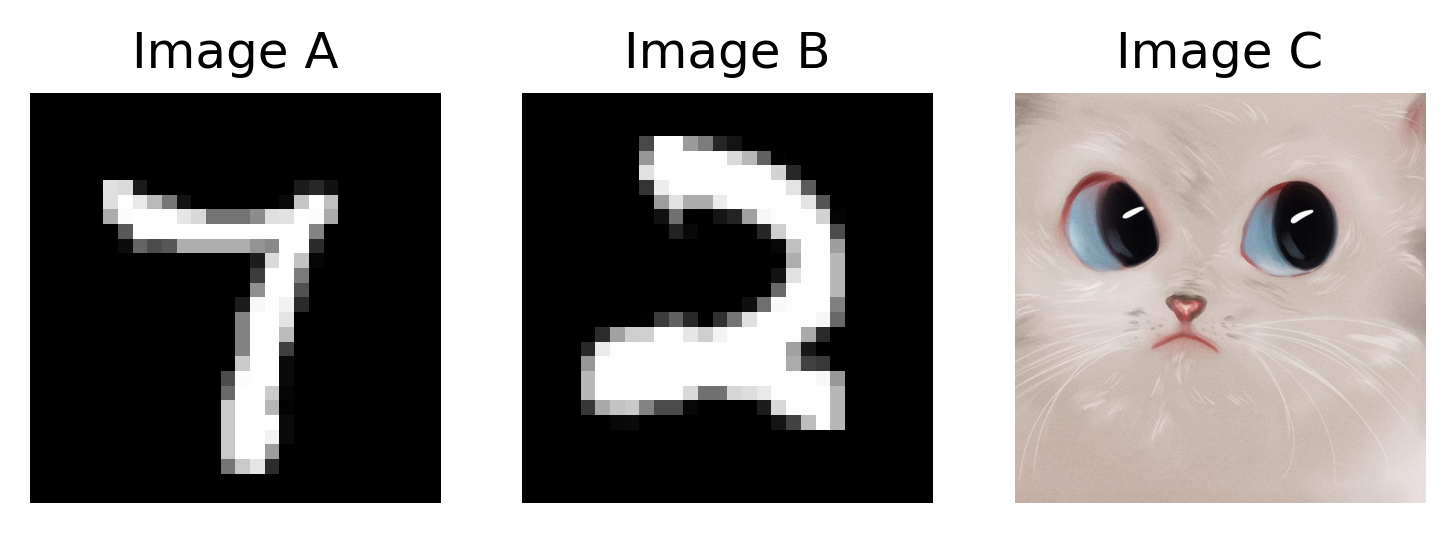  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!

In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Plus le pourcentage d'erreur de votre algorithme est bas meilleur est votre solution.  
  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}} \times 100$$  
Une image mal classée est une image pour laquelle l'algorithme a donné une prédiction différente de la vraie classe de l'image:  
$$\hat r \neq r$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?  
Calculez le pourcentage d'erreur de l'algorithme. **Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 30 000 images.  
!!!

In [ ]:
calculer_score_etape_1()

## Image numérique

!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
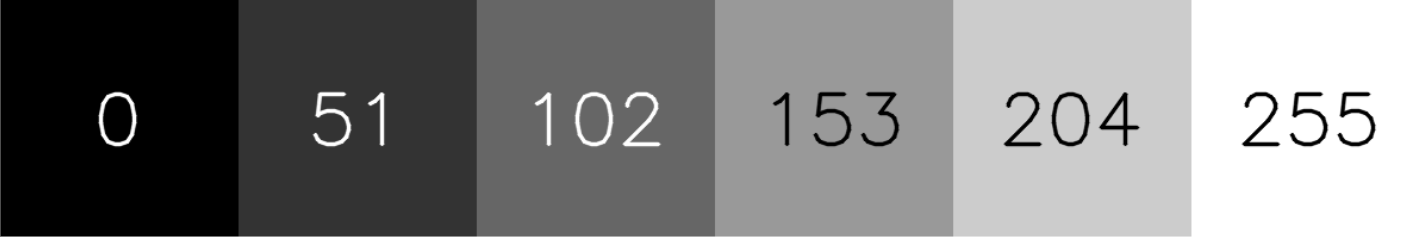  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!

In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question Quelle est la valeur du pixel (18,15) ?  
Lisez dans le tableau la valeur du pixel en position (18,15) et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
Remarque : La première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne)  
!!!

In [ ]:
pixel = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_pixel()

!!! question Transformez le pixel (17,15) en pixel noir  
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!

In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## Réseaux de neurones

!!! tip Qu'est ce qu'un neurone en IA ?  
Un neurone artificiel est une fonction qui prend en entrée une liste de caractéristiques `c` et renvoie un vote `v`.  
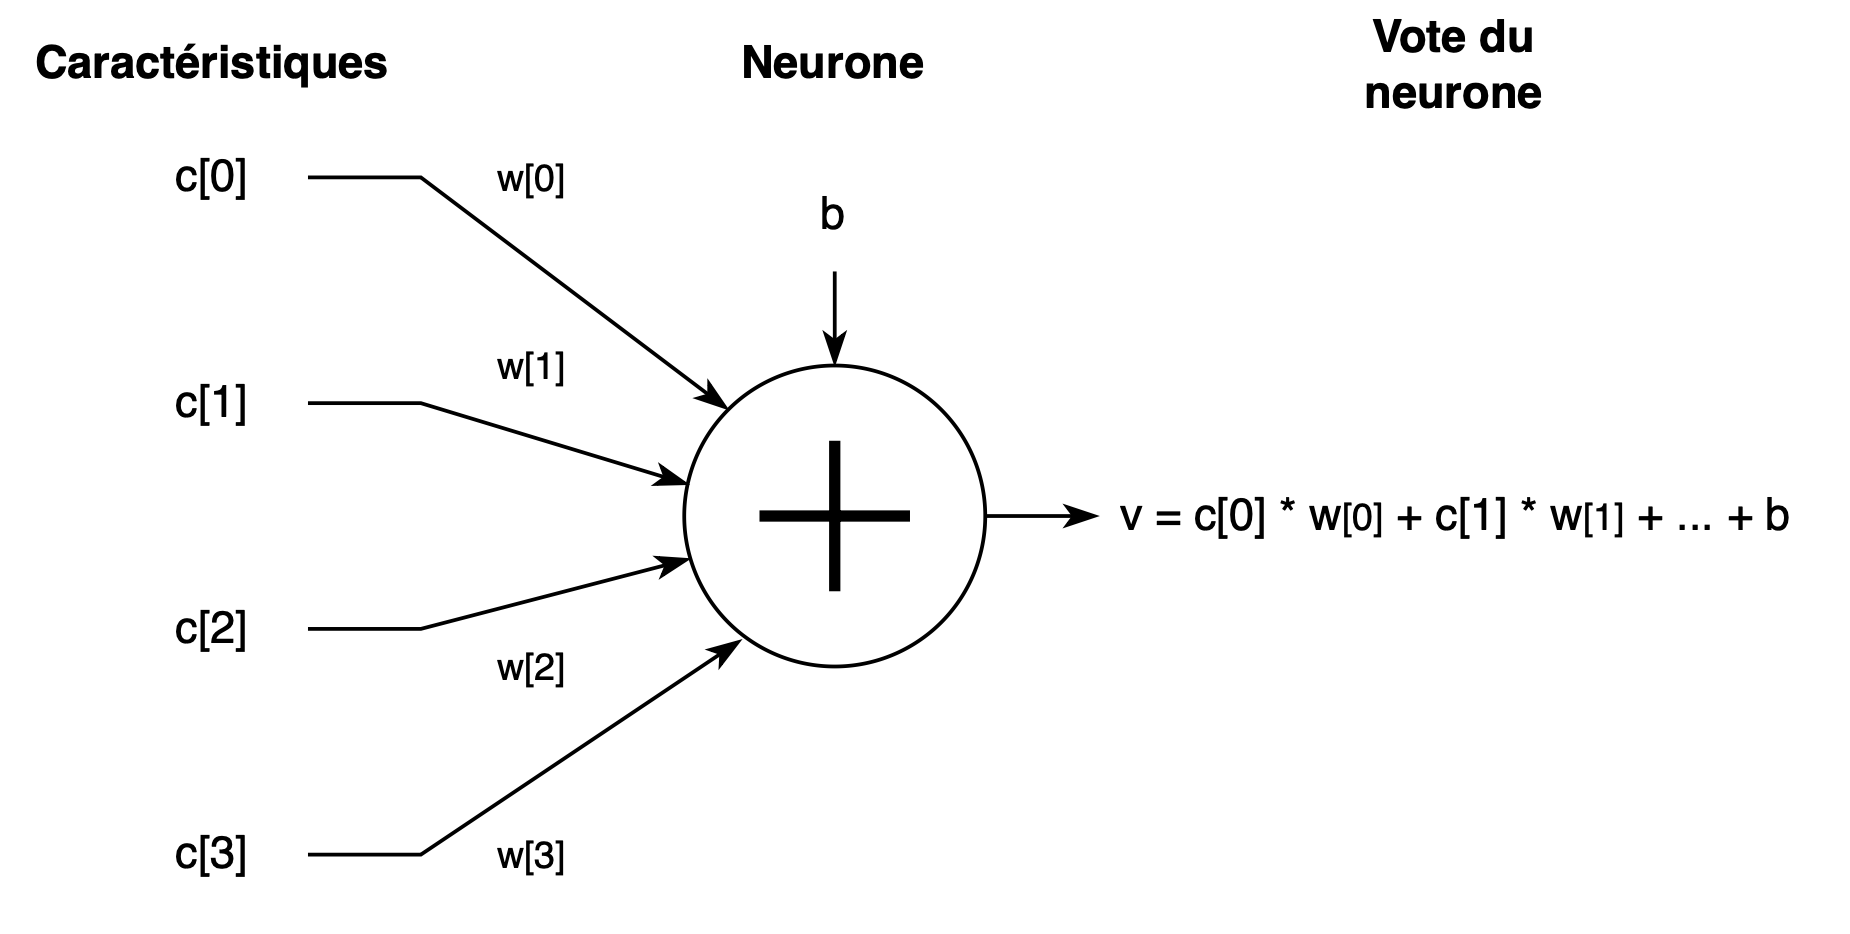  
La vote `v` est une combinaison linéaire des caractéristiques, pondérée par des coefficients appelés poids notés `w`. Chaque neurone a autant de poids que de caractéristiques en entrée, plus un biais `b` que l'on ajoute à la fin du calcul.  
**Par exemple**, si le biais et les poids du neurone sont tous à 0 sauf le premier à 1, le neurone renverra la valeur de la première caractéristique `c[0]`.  
!!!
!!! question Quelle sera la valeur de sortie de ce neurone ?  
Pour les images, les caractéristiques vont être les valeurs des pixels : $c = d$. Voici une image d'entrée 2x2 pixels donc 4 caractéristiques et un neurone avec les poids et biais suivants :  
  
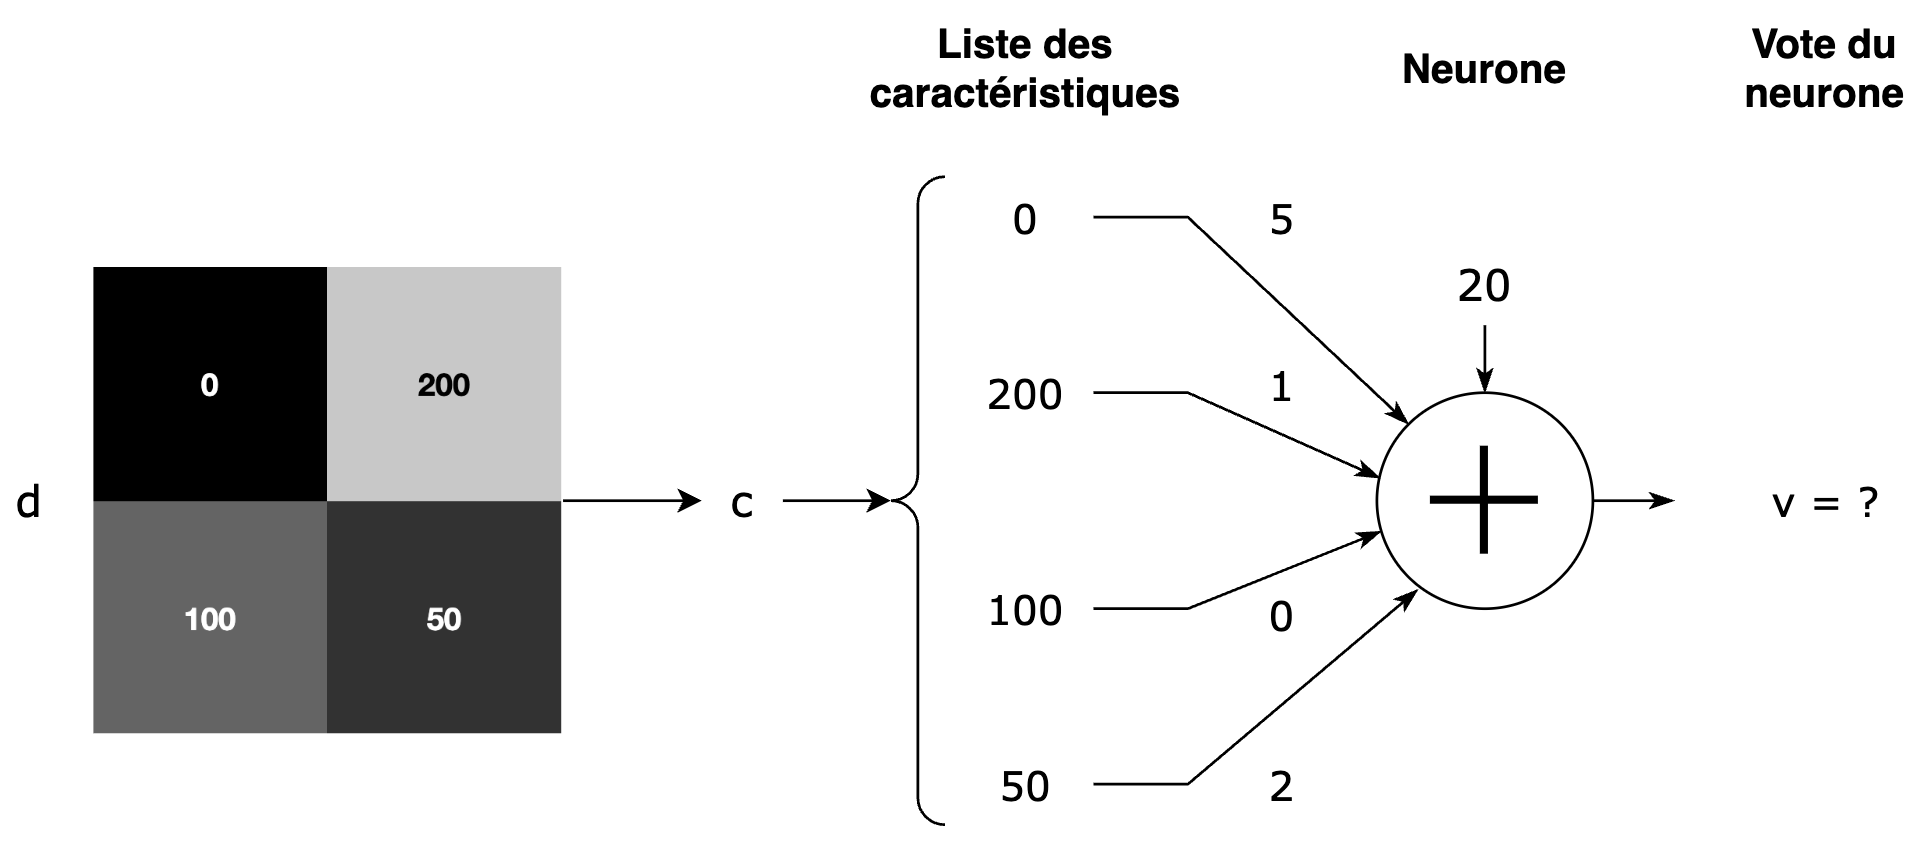  
Remplacez les `...` dans la cellule suivante par le vote `v` du neurone pour cette image puis **exécutez la cellule**.  
!!!

In [ ]:
v = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_vote_neurone()

!!! tip Couche de neurones  
Un réseau de neurones est composé de une ou plusieurs couches ayant chacune plusieurs neurones. Notre réseau aura **une couche de 10 neurones**. Chaque neurone vote pour un chiffre. **L'estimation de notre algorithme sera le chiffre qui aura le plus de votes.**  
  
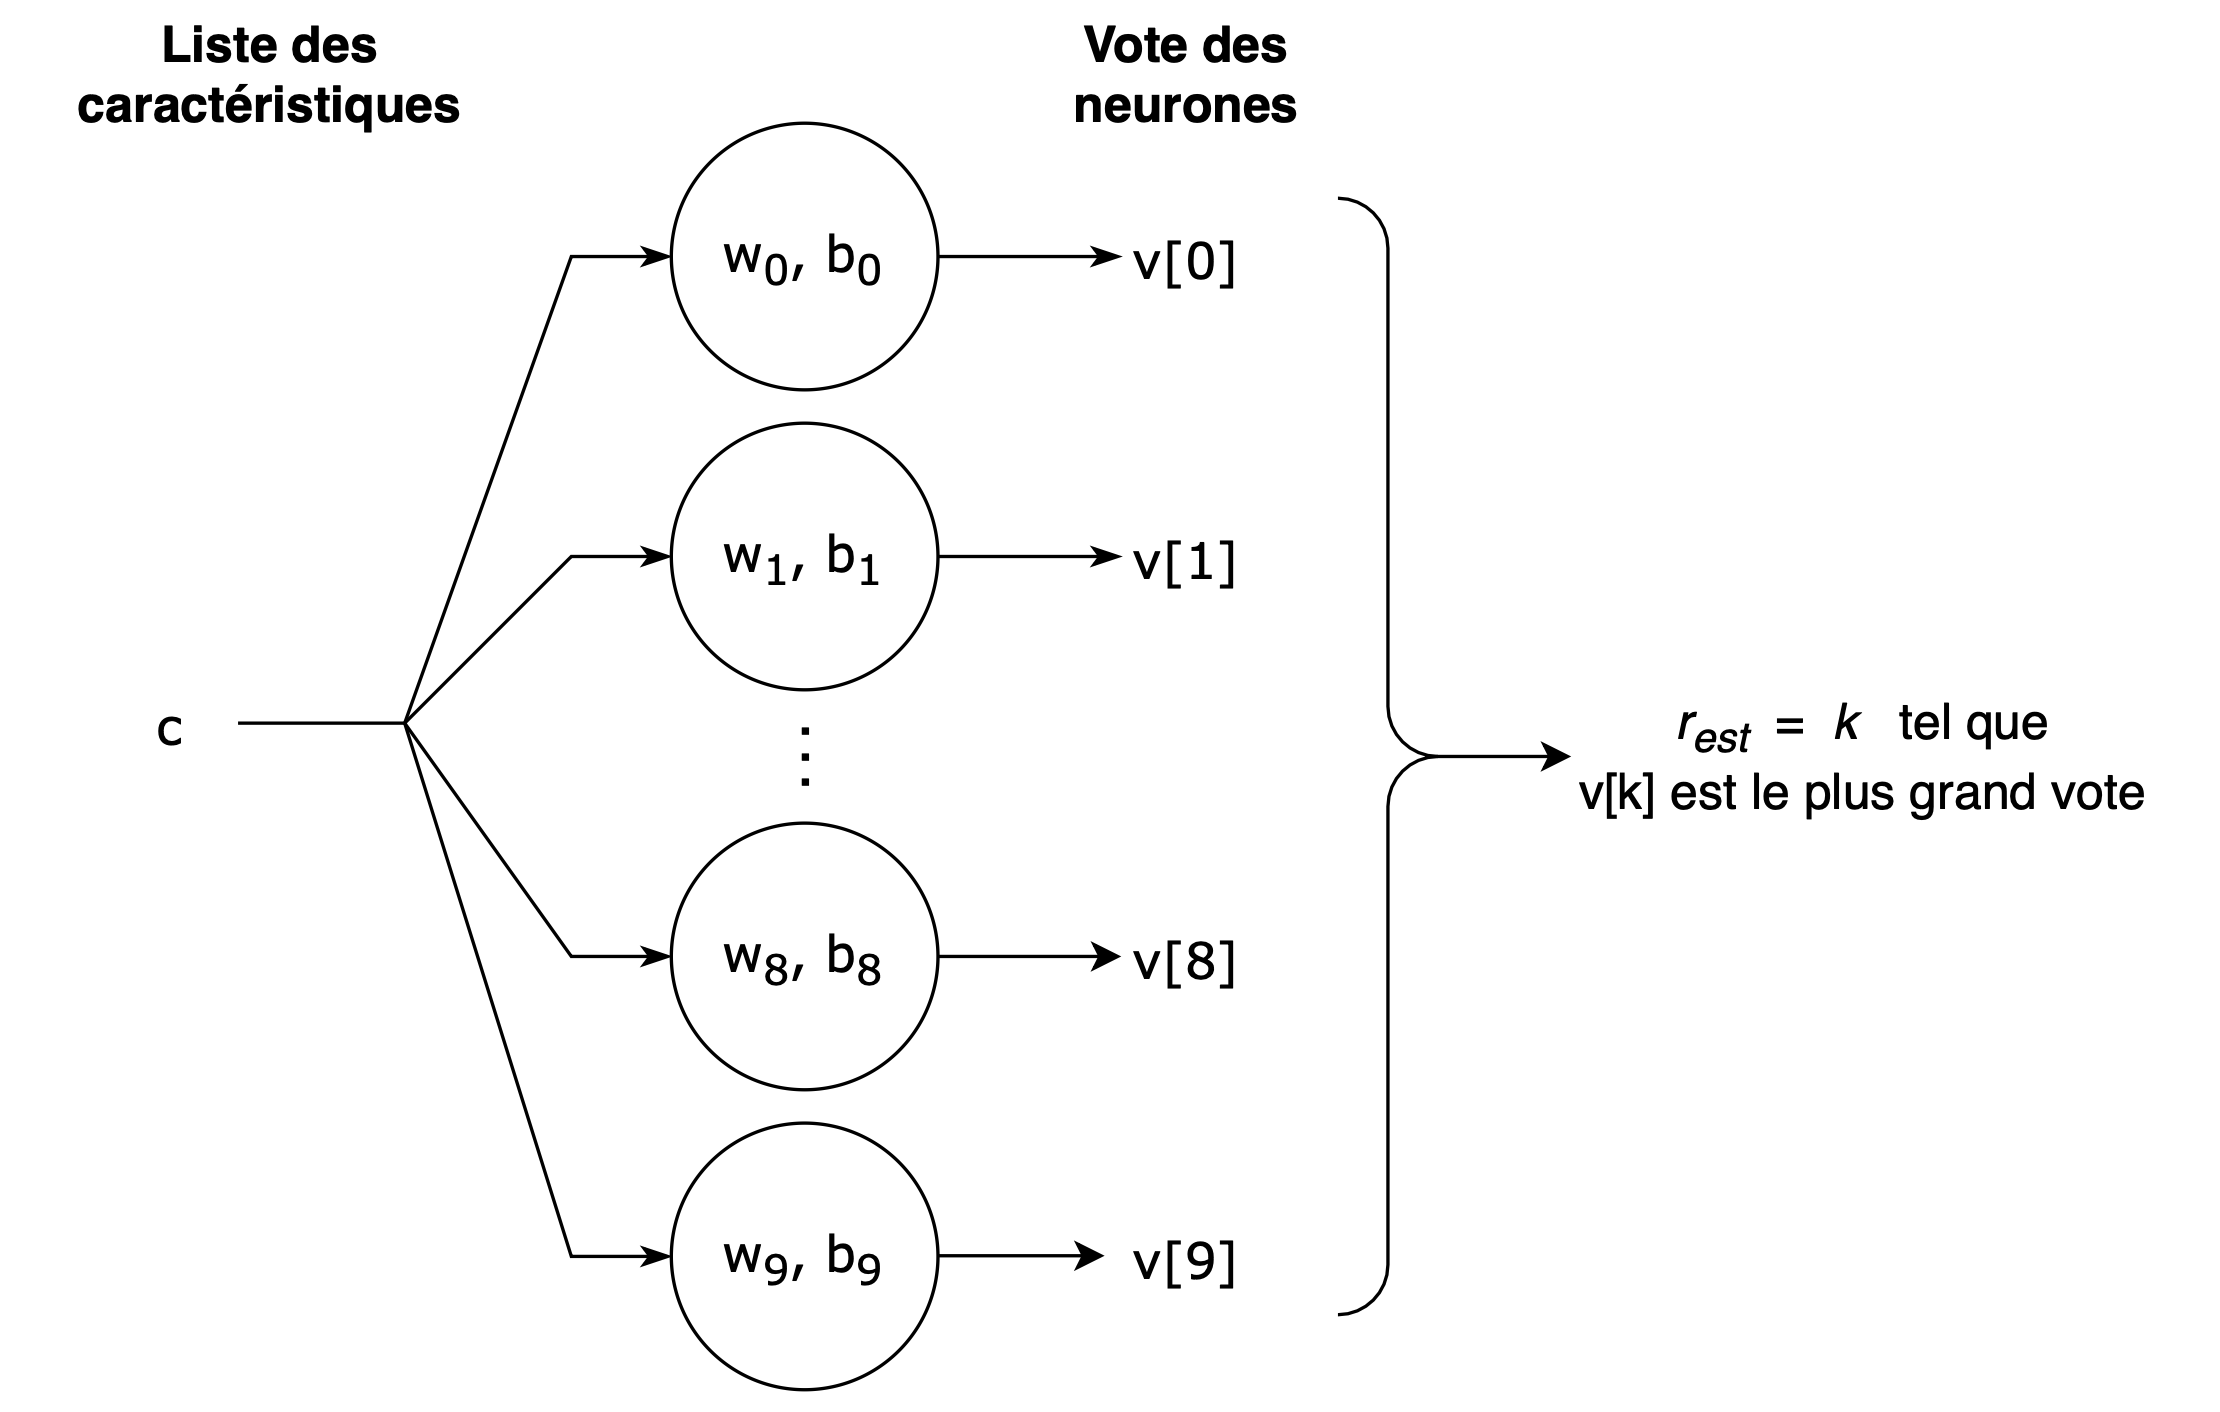  
!!!
!!! question Quelle est l'estimation `r_est` du réseau pour cette image ?  
Quel est le chiffre `r_est` sur cette image **estimé** par le réseau de neurones ?  
  
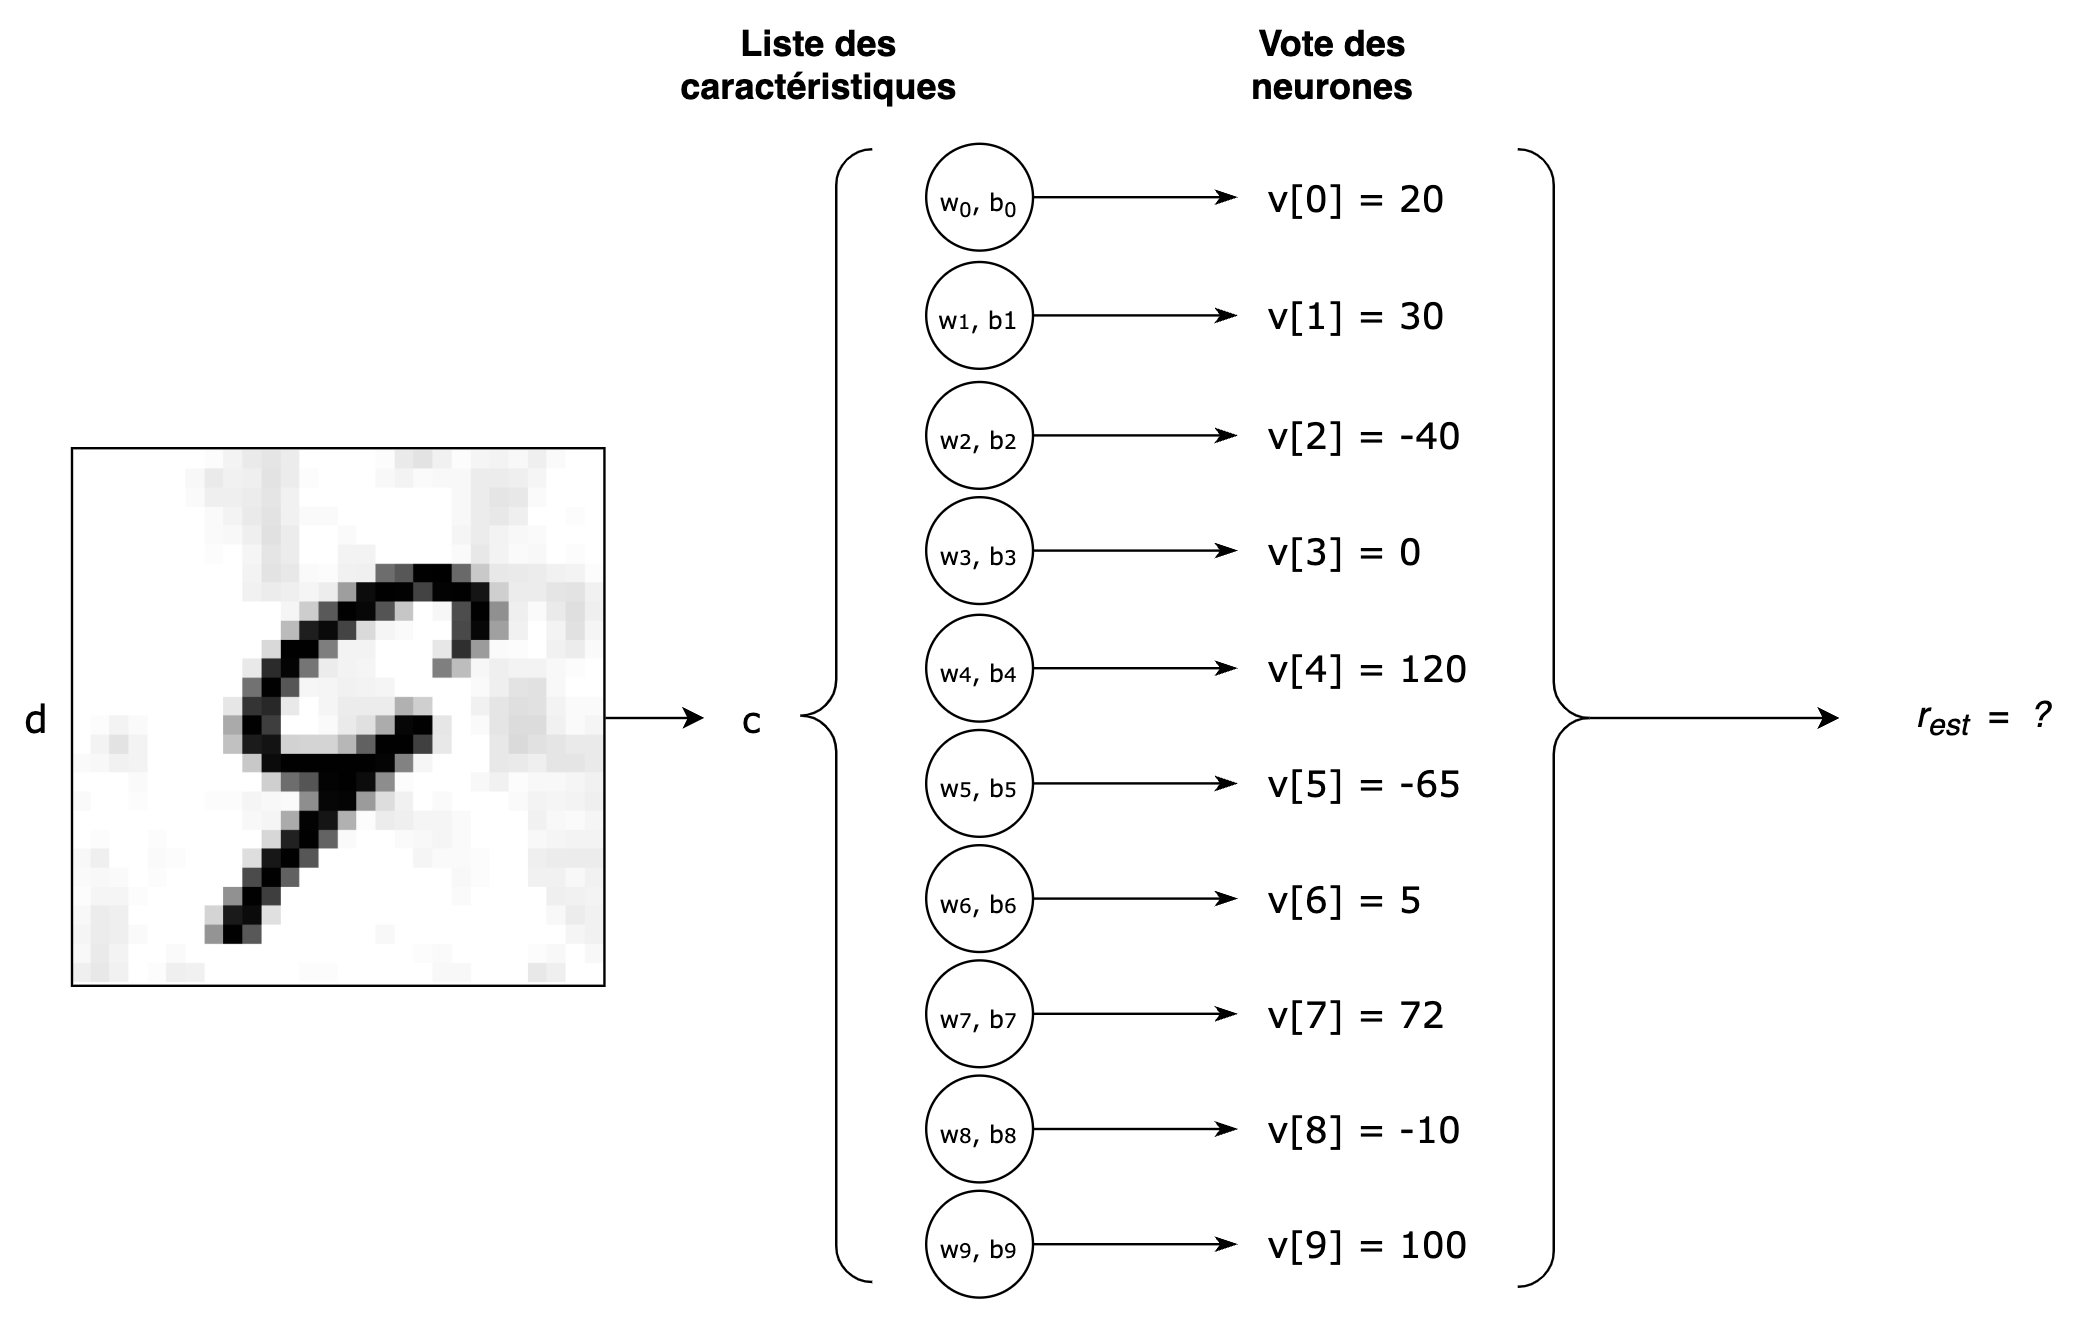  
Regardez le nombre de votes pour chaque chiffre en sortie des neurones puis donnez votre réponse dans la cellule suivante.  
!!!

In [ ]:
r_est = ...

# NE PAS TOUCHER CETTE LIGNE
validation_estimation_reseau()

## Implémentation

!!! tip Calcul des caractéristiques  
Pour commencer, nous prenons $c = d$ c'est à dire que les caractéristiques sont les valeurs des pixels de l'image `d`.  
Exécutez la cellule suivante pour définir la fonction `calculer_caracteristiques` qui transforme l'image en paramètre `d` (liste 2 dimensions) en la liste des caractéristique `c` (une seule dimension).  
Vous pourrez plus tard modifier cette fonction pour calculer de nouvelles caractéristiques.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    c = []
    for i in range(len(d)):
        for j in range(len(d[i])):
            c.append(d[i][j])
    
    return c 

validation_execution_calculer_caracteristiques()

!!! tip Fonction de vote  
Complétez la fonction `vote_neurone` pour qu'elle renvoie le vote `v` du neurone puis exécutez la cellule.  
La fonction `vote_neurone` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques  
- `w` : Les poids du neurones, une liste de la même taille que la liste c  
- `b` : La valeur du biais du neurone  
!!!

In [ ]:
def vote_neurone(c, w, b):
    v = 0 # On initialise à 0
    for i in range(len(c)): # Pour chaque pixel
        # TODO : Ajouter les votes du pixel i
        v = v + c[i] * w[i]
    
    # TODO : ajouter le biais
    v = v + b
    
    return v

# NE PAS TOUCHER CETTE LIGNE
validation_vote_neurone()

!!! tip Calcul des votes de chaque neurone  
Pour chaque image, on calcule le vote de chaque neurone correspondant chacun à un chiffre.  
Complétez la fonction `calcul_votes` pour qu'elle renvoie une liste de 10 valeurs, les votes de chaque neurone. Utilisez votre fonction précédente !  
La fonction `calcul_votes` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques  
- `W` : Les poids de chaque neurones, une liste de 10 valeurs ou chaque élément W[k] est les poids `w` du neurone k  
- `B` : Les biais de tous les neurones, une liste de 10 valeurs ou chaque élément est le biais `b` du neurone k  
!!!

In [ ]:
def calcul_votes(c, W, B):
    votes = [] # On initialise en liste vide puis on va ajouter les votes un par un
    for i in range(10): # pour chaque neurone / chiffre
        # TODO : récupérer les votes du neurone i
        w = W[i]
        b = B[i]
        v = vote_neurone(c, w, b)
        
        votes.append(v)
            
    return votes

# NE PAS TOUCHER CETTE LIGNE
validation_calcul_votes()

!!! tip Estimation finale  
Completer la fonction `estimation` pour qu'elle renvoie le chiffre prédit par le réseau de neurones.  
La fonction `estimation` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques  
- `W` : Les poids de chaque neurones, une liste de 10 valeurs ou chaque élément W[k] est les poids `w` du neurone k  
- `B` : Les biais de tous les neurones, une liste de 10 valeurs ou chaque élément est le biais `b` du neurone k  
!!!

In [ ]:
def estimation(c, W, B):
    # TODO : récupérer les votes de chaque neurone
    votes = calcul_votes(c, W, B)
    # TODO : quel est le nombre maximum de vote
    max_vote = max(votes)
    
    return votes.index(max_vote) # renvoie le chiffre correspondant à ce maximum

# NE PAS TOUCHER CETTE LIGNE
validation_estimation()

## Apprentissage

!!! abstract Apprentissage des poids  
Dans l'état actuel, peut importe l'image, chaque chiffre aurait 0 votes car tous les poids et biais sont initialisés à 0.  
Il faut maintenant modifier les poids et biais. Le principe de l'intelligence artificielle est de **laisser l'algorithme trouver les bons poids et biais**. C'est ce qu'on appelle la phase d'apprentissage.  
L'apprentissage est possible car nous avons beaucoup de données, 30 000 images qui vont servir d'exemples à notre réseau de neurones.  
!!!
!!! tip Perceptron  
Le perceptron est un algorithme d'apprentissage qui modifie les poids et biais avec la stratégie suivante :  
1. Pour chaque image, on calcule les votes de chaque neurone  
2. Si le réseau a voté pour le bon chiffre, on ne change rien  
3. Si le réseau a voté pour un mauvais chiffre, on va modifier les poids selon un paramètre `a`:  
   - On ajoute les valeurs des caractéristiques `c` de l'image au poids `w` du neurone pour le bon chiffre : $w[i] = w[i] + a * c[i]$  
   - On soustrait les valeurs des caractéristiques `c` de l'image au poids `w` du neurone pour le mauvais chiffre qui a été voté : $w[i] = w[i] - a * c[i]$  
   - On ajoute $a$ au biais du bon chiffre  
   - On soustrait $a$ au biais du mauvais chiffre  
4. On répète ces étapes pour chaque image  
!!!

In [ ]:
# A GARDER ?

def initialiser_poids(nombre_poids, nombre_classes):
    poids = np.zeros((nombre_classes, nombre_poids))
    biais = np.zeros(nombre_classes)
    return poids, biais

# élève 
nombre_poids = ...
nombre_classes = ...

# solution
nombre_poids = 784
nombre_classes = 10

# NE PAS TOUCHER CETTE LIGNE
poids, biais = initialiser_poids(nombre_poids, nombre_classes)

affichage_poids(poids)

#TEST:
assert (nombre_poids == 784)*(nombre_classes == 10)

!!! tip Apprentissage  
Complétez la fonction `apprentissage_perceptron` pour qu'elle renvoie les poids et biais du réseau de neurones issus de l'apprentissage.  
La fonction `apprentissage_perceptron` prend en paramètres d'entrée :  
- `d_train` : La liste des images pour entraîner votre réseau  
- `r_train` : La liste des vraies réponses pour chaque image de `d_train`  
- `a` : Le paramètre d'apprentissage du perceptron  
!!!

In [ ]:
def apprentissage_perceptron(d_train, r_train, a = 1):
    nb_caracteristiques = len(calculer_caracteristiques(d_train[0]))
    W = np.zeros((10, nb_caracteristiques))
    B = np.zeros(10)
    
    for i in range(len(d_train)):
        d = d_train[i]
        c = calculer_caracteristiques(d)
        r = r_train[i] # La vraie réponse
    
        r_est = estimation(c, W, B)

        if r_est != r:
            # Poids du neurone pour le bon chiffre
            w_r = W[r]
            
            # Poids du neurone pour le mauvais chiffre estimé
            w_r_est = W[r_est]
            
            for p in range(len(c)): # Boucle sur les caractéristiques pour faire les modifications de poids
                w_r[p] = w_r[p] + a * c[p]
                w_r_est[p] = w_r_est[p] - a * c[p]
                
            B[r] = B[r] + a
            B[r_est] = B[r_est] - a

    return W, B

# NE PAS TOUCHER CETTE LIGNE
validation_apprentissage_perceptron()

!!! tip Lancer l'apprentissage  
Pour lancer l'apprentissage, **exécutez la cellule suivante**.  
!!!

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("visualisation des poids")
affichage_poids(W)
print("biais :", B)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

!!! tip Score de test  
Dans ce challenge, vous serez classé en fonction de votre pourcentage d'erreur sur des images de test, pour lesquelles vous ne connaissez pas la bonne réponse.  
Le pourcentage d'erreur ci-dessus est votre score d'entraînement sur les images que vous avez utilisées pour apprendre les poids et biais de votre réseau de neurones. Exécutez la cellule ci-dessous pour faire votre première soumission dans le classement et voir votre score de test.  
!!!

In [ ]:
soumettre(W, B)

## Ajout de caractéristiques

!!! tip Ajoutez des caractéristiques  
Jusqu'à maintenant les caractéristiques $c$ en entrée des neurones étaient uniquement les pixels de l'image : $c = d$  
Vous pouvez maintenant ajoutez et/ou modifier les caractéristiques données aux neurones pour tenter de diminuer votre pourcentage d'erreur. Note : il y a toujours autant de poids que de caractéristiques en entrée.  
Modifiez la fonction `calculer_caracteristiques` pour ajouter vos caractéristiques. La fonction doit renvoyer la liste `c` des caractéristiques de l'image.  
!!!
!!! tip Exemple de caractéristiques  
Par exemple, vous pouvez ajouter les différences absolues de pixel abs(d[i + 1] - d[i]) à la liste des caractéristiques. Cela permet de détecter les contours de l'image.  
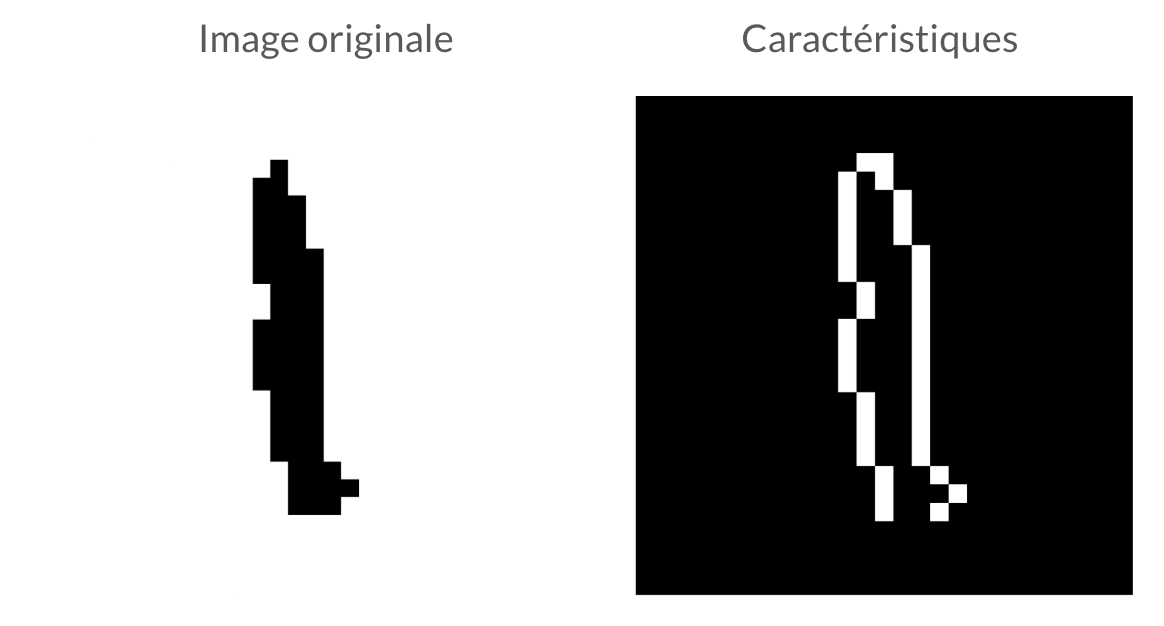  
Modifiez la fonction ci-dessous pour ajouter à la liste des caractéristiques les différences de pixel **abs(d[i + 1] - d[i])**.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    c = []
    for i in range(len(d)):
        for j in range(len(d[i])):
            c.append(d[i][j])
    
    # TODO : ajouter à la liste c les contours d[i + 1] - d[i]
    for i in range(783):
        c.append(abs(c[i + 1] - c[i]))

    return c

# NE PAS TOUCHER CETTE LIGNE
validation_calculer_caracteristiques_contours()

!!! tip Lancer l'apprentissage  
Pour lancer l'apprentissage, **exécutez la cellule suivante**.  
!!!

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

!!! tip Nouvelle soumission  
Pour soumettre votre nouvelle solution, **exécutez la cellule suivante**.  
!!!

In [ ]:
soumettre(W, B)

!!! tip Quartier libre  
Continuez à tester vos caractéristiques en modifiant la fonction `calculer_caracteristiques` et en répétant les étapes d'apprentissage et de soumission test.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    c = []
    for i in range(len(d)):
        for j in range(len(d[i])):
            c.append(d[i][j])
    
    # TODO : ajoutez vos caractéristiques !

    return c

# NE PAS TOUCHER CETTE LIGNE
validation_calculer_caracteristiques_custom()

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

In [ ]:
soumettre(W, B)